In [1]:
# needed for processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#needed for openai gym environment
import gym
import gym_anytrading

# needed for reinforcement learning 
from stable_baselines3.common.vec_env import DummyVecEnv #wrapper vec
from stable_baselines3 import DQN
from stable_baselines3 import PPO
from stable_baselines3 import A2C


from finta import TA
from gym_anytrading.envs import StocksEnv

In [2]:
abc_df = pd.read_csv('ABC.csv')

In [3]:
abc_df = abc_df.drop(columns=['Dividends', 'Stock Splits'])
abc_df['N_date'] = abc_df['Date'].str[:10]
abc_df['N_date'] = pd.to_datetime(abc_df['N_date'])
abc_df = abc_df.drop(columns=['Date'])
abc_df.rename(columns = {'N_date':'Date'}, inplace=True)
abc_df.set_index('Date', inplace=True)
abc_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-04-04,2.256677,2.280685,2.160649,2.268681,40387200
1995-04-05,2.232671,2.280685,2.184656,2.184656,12236800
1995-04-06,2.184657,2.256678,2.184657,2.220667,3776000
1995-04-07,2.232671,2.232671,2.184656,2.184656,1920800
1995-04-10,2.184656,2.232670,2.184656,2.208663,2047200


In [4]:
abc_env = gym.make('stocks-v0', df=abc_df, frame_bound=(700,3500), window_size=5)

info {'total_reward': 2.67145490646363, 'total_profit': 5.378993813187781e-05, 'position': 0}


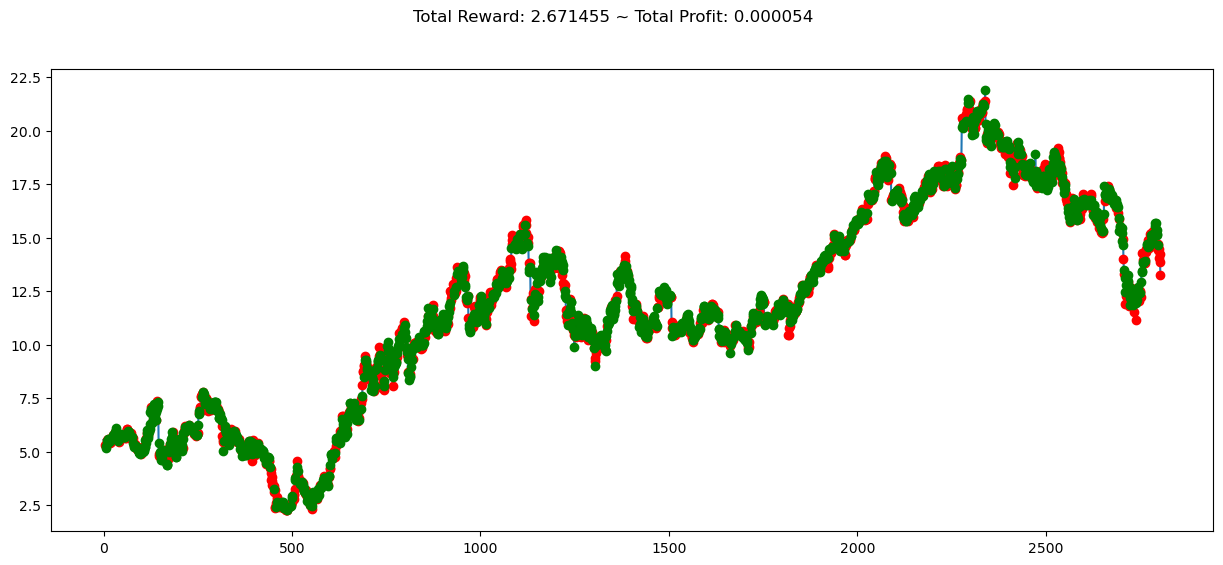

In [5]:
state = abc_env.reset() #getting initial state
# loop through each step we take a random action
while True:
    # randomly buy or sell
    action = abc_env.action_space.sample()
    n_state, reward, done, info = abc_env.step(action)
    if done:
        print("info", info)
        break
random_strat_result = info['total_profit']      
plt.figure(figsize=(15,6))
plt.cla()
abc_env.render_all()
plt.show()

In [6]:
abc_maker = lambda: gym.make('stocks-v0', df=abc_df, frame_bound=(700,3500), window_size=5)
# can try this with other types of enivornment not just the DummyVec
abc_env = DummyVecEnv([abc_maker])

In [7]:
a2c_model = A2C('MlpPolicy', abc_env,verbose=1)
a2c_model.learn(total_timesteps=25000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 740      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0.198    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0551   |
|    value_loss         | 0.0068   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 724      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.414   |
|    explained_variance | -26.2    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.000431 |
|    value_loss      

-------------------------------------
| time/                 |           |
|    fps                | 709       |
|    iterations         | 1700      |
|    time_elapsed       | 11        |
|    total_timesteps    | 8500      |
| train/                |           |
|    entropy_loss       | -0.43     |
|    explained_variance | -1.16     |
|    learning_rate      | 0.0007    |
|    n_updates          | 1699      |
|    policy_loss        | -0.000545 |
|    value_loss         | 1.14e-05  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 709      |
|    iterations         | 1800     |
|    time_elapsed       | 12       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.507   |
|    explained_variance | -0.00678 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 0.279    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 713      |
|    iterations         | 3300     |
|    time_elapsed       | 23       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.663   |
|    explained_variance | -0.0185  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 0.134    |
|    value_loss         | 0.0692   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 714      |
|    iterations         | 3400     |
|    time_elapsed       | 23       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.611   |
|    explained_variance | -0.0773  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | -0.152   |
|    value_loss         | 0.0414   |
-

------------------------------------
| time/                 |          |
|    fps                | 691      |
|    iterations         | 4900     |
|    time_elapsed       | 35       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.00845 |
|    explained_variance | -14.4    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 4.03e-08 |
|    value_loss         | 1.97e-08 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 690      |
|    iterations         | 5000     |
|    time_elapsed       | 36       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.00858 |
|    explained_variance | -5.43    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 2.01e-07 |
|    value_loss         | 5.32e-08 |
-

info {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


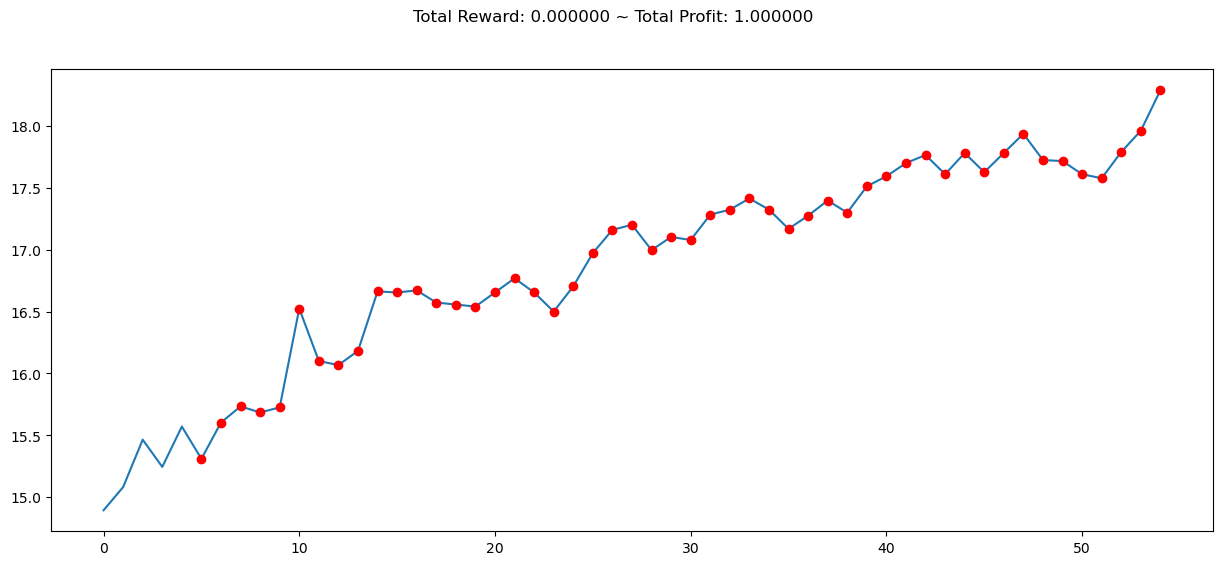

In [8]:
abc_env = gym.make('stocks-v0', df=abc_df, frame_bound=(3600,3650), window_size=5)
obs = abc_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = a2c_model.predict(obs)
    obs,rewards, done, info = abc_env.step(action)
    if done:
        print('info', info)
        break
A2C_result = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
abc_env.render_all()
plt.show()

In [9]:
dqn_model = DQN('MlpPolicy', abc_env, verbose=1)
dqn_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.02     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10704    |
|    time_elapsed     | 0        |
|    total_timesteps  | 196      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.05     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9835     |
|    time_elapsed     | 0        |
|    total_timesteps  | 392      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.23   

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 9082     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4508     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 9054     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4704     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.11     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 8944     |
|    time_elapsed     | 0        |
|    total_timesteps  | 8820     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.13     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 9000     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9016     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.11     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.22     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 8827     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 8774     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13328    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.23     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 8765     |
|    time_elapsed     | 1        |
|    total_timesteps  | 17444    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 8718     |
|    time_elapsed     | 2        |
|    total_timesteps  | 17640    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 8564     |
|    time_elapsed     | 2        |
|    total_timesteps  | 21756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 8589     |
|    time_elapsed     | 2        |
|    total_timesteps  | 21952    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

info {'total_reward': 0.0, 'total_profit': 1.1545222819400205, 'position': 1}


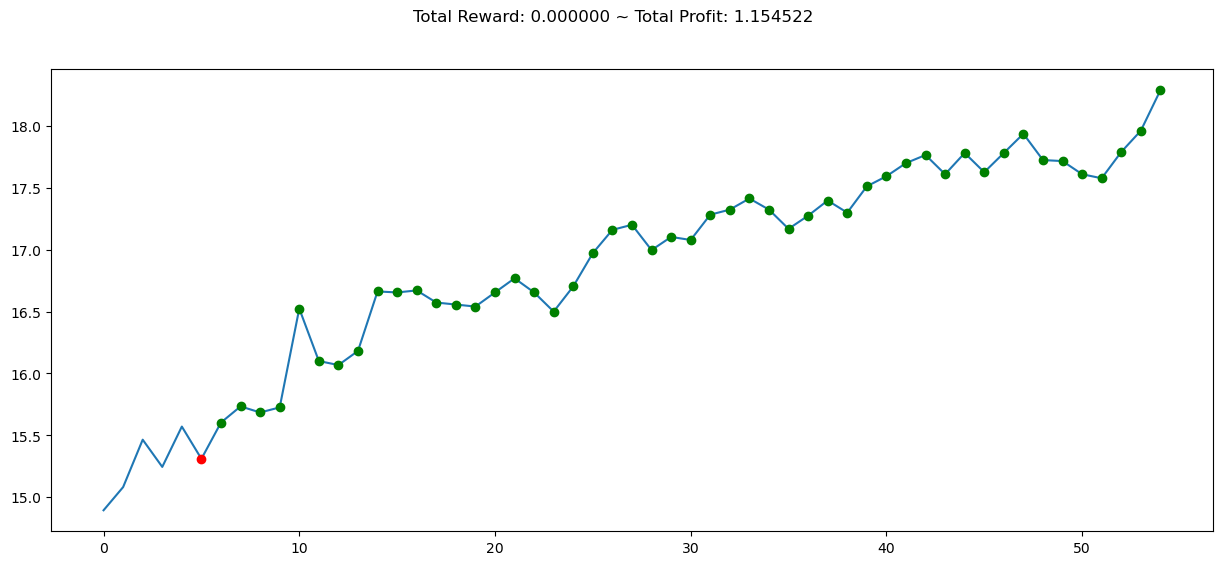

In [10]:
abc_env = gym.make('stocks-v0', df=abc_df, frame_bound=(3600,3650), window_size=5)
obs = abc_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = dqn_model.predict(obs)
    obs,rewards, done, info = abc_env.step(action)
    if done:
        print('info', info)
        break
DQN_result = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
abc_env.render_all()
plt.show()

In [11]:
ppo_model = PPO('MlpPolicy', abc_env, verbose=1)
ppo_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | 1.26     |
| time/              |          |
|    fps             | 1349     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49          |
|    ep_rew_mean          | 1.23        |
| time/                   |             |
|    fps                  | 869         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018817604 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49          |
|    ep_rew_mean          | 2.23        |
| time/                   |             |
|    fps                  | 782         |
|    iterations           | 11          |
|    time_elapsed         | 28          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.010073615 |
|    clip_fraction        | 0.0861      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.518      |
|    explained_variance   | 0.79        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0278      |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00371    |
|    value_loss           | 0.0705      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49    

info {'total_reward': 2.4289999008178693, 'total_profit': 1.0375137852869658, 'position': 1}


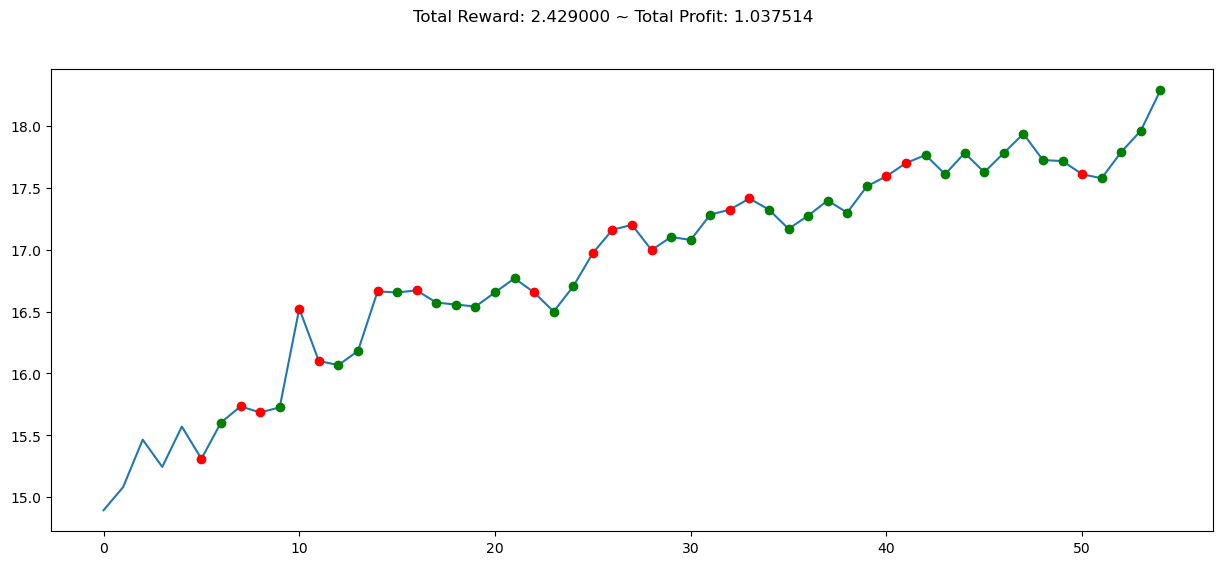

In [12]:
abc_env = gym.make('stocks-v0', df=abc_df, frame_bound=(3600,3650), window_size=5)
obs = abc_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = ppo_model.predict(obs)
    obs,rewards, done, info = abc_env.step(action)
    if done:
        print('info', info)
        break
PPO_result = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
abc_env.render_all()
plt.show()

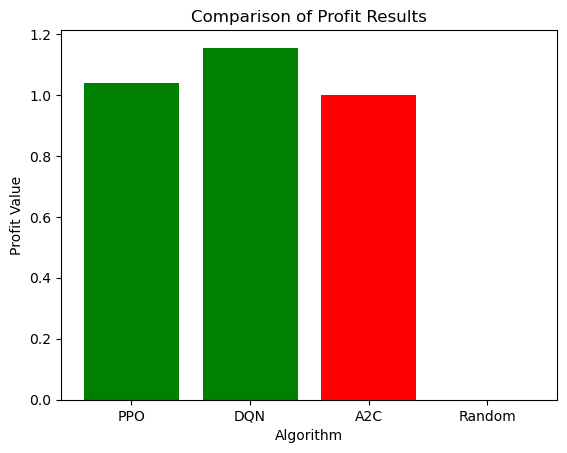

In [13]:
## viusalise result

x = ['PPO', 'DQN', 'A2C', 'Random']
y = [PPO_result, DQN_result, A2C_result, random_strat_result]
colors = ['green' if result > 1 else 'red' for result in y ]
plt.bar(x, y, color=colors)
plt.title('Comparison of Profit Results')
plt.xlabel('Algorithm')
plt.ylabel('Profit Value')
plt.show()